<a href="https://colab.research.google.com/github/greinaldi/repositorio/blob/main/pre_processamento_iris_alterado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré-processamento do dataset Iris, com dados alterados

### Sobre: trata-se de um arquivo Iris com dados alterados, utilizado para exercícios de pré-processamento e limpeza de dados, com o objetivo de aprendizado.

Sumário:
1. Importação das bibliotecas, leitura do dataset e tipos de dados  
2. Pré-processamento: eliminação de atributos irrelevantes  
3. Pré-processamento: tratamento de valores duplicados, ausentes e inconsistentes  
4. Pré-processamento: exclusão dos valores inconsistentes  
5. Pré-processamento: substituição de valores ausentes pela média  
6. Definição do atributo alvo e dos atributos independentes  

##### 1. Importação das bibliotecas, leitura do dataset e tipos de dados

In [86]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Leitura do arquivo
dados = pd.read_csv('/content/drive/MyDrive/AprendizadoDeMaquina/iris3.csv', sep=';')

In [88]:
# Visualização do dataset
dados.head()

,codigo,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cor,classe
0,17,5.1,3.5,1.4,0.2,roxa,Iris-setosa
1,179,4.9,3.0,1.4,0.2,amarela,Iris-setosa
2,135,4.7,3.2,1.3,0.2,roxa,Iris-setosa
3,380,4.6,3.1,1.5,0.2,amarela,Iris-setosa
4,126,5.0,3.6,1.4,0.2,roxa,Iris-setosa


In [89]:
# Tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   codigo              152 non-null    int64  
 1   comprimento_sepala  149 non-null    float64
 2   largura_sepala      152 non-null    float64
 3   comprimento_petala  152 non-null    float64
 4   largura_petala      150 non-null    float64
 5   cor                 152 non-null    object 
 6   classe              152 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 8.4+ KB


##### 2. Pré-processamento: eliminação de atributos irrelevantes

In [90]:
# Exclusão da coluna com índice
dados.drop(columns=['codigo'], inplace=True)

In [91]:
# Verificação da exclusão
dados.columns

Index(['comprimento_sepala', 'largura_sepala', 'comprimento_petala',
       'largura_petala', 'cor', 'classe'],
      dtype='object')

##### 3. Pré-processamento: tratamento de valores duplicados, ausentes e inconsistentes

In [92]:
# Valores duplicados
dados.loc[dados.duplicated()]

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cor,classe


In [93]:
# Valores ausentes
idxRowNan = pd.isnull(dados).any(axis=1).to_numpy().nonzero()
idxRowNan

(array([117, 121, 125, 131]),)

In [94]:
# Visualização dos valores ausentes
dados.iloc[idxRowNan]

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cor,classe
117,6.4,3.2,5.3,NaN,roxa,Iris-virginica
121,NaN,2.2,5.0,NaN,amarela,Iris-virginica
125,NaN,2.7,4.9,1.8,roxa,Iris-virginica
131,NaN,3.0,5.8,1.6,amarela,Iris-virginica


In [95]:
# Indicadores estatísticos
dados.describe()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,149.000000,152.000000,152.000000,150.000000
mean,5.826846,3.058553,3.876974,1.316667
std,0.822786,0.437398,2.280161,1.727100
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.200000,21.700000,20.200000


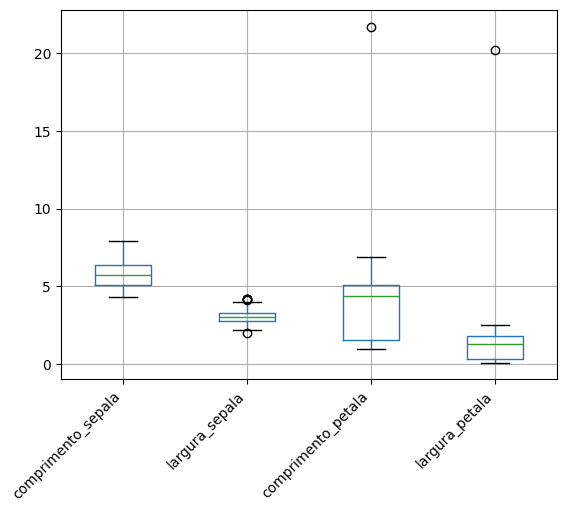

In [96]:
# Verificação de valores outliers por meio do boxplot
dados.boxplot()
plt.xticks(rotation=45, ha='right')
plt.show()

In [97]:
# Análise das cores do dataset
# Valores únicos no atributo cor
dados['cor'].unique()

array(['roxa', 'amarela', 'azul'], dtype=object)

In [98]:
# Frequência relativa no atributo cor
dados['cor'].value_counts(normalize=True) * 100

,proportion
cor,
amarela,35.526316
roxa,32.236842
azul,32.236842


In [99]:
# Distribuição das classes
dados['classe'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [100]:
# Médias dos atributos por cor
media_amarela_iris_setosa = dados.loc[(dados['cor'] == 'amarela') & (dados['classe'] == 'Iris-setosa')][['comprimento_sepala',	'largura_sepala',	'comprimento_petala', 'largura_petala']].mean()
media_amarela_iris_versicolor = dados.loc[(dados['cor'] == 'amarela') & (dados['classe'] == 'Iris-versicolor')][['comprimento_sepala',	'largura_sepala',	'comprimento_petala', 'largura_petala']].mean()
media_amarela_iris_virginica = dados.loc[(dados['cor'] == 'amarela') & (dados['classe'] == 'Iris-virginica')][['comprimento_sepala',	'largura_sepala',	'comprimento_petala', 'largura_petala']].mean()

media_azul_iris_setosa = dados.loc[(dados['cor'] == 'azul') & (dados['classe'] == 'Iris-setosa')][['comprimento_sepala',	'largura_sepala',	'comprimento_petala', 'largura_petala']].mean()
media_azul_iris_versicolor = dados.loc[(dados['cor'] == 'azul') & (dados['classe'] == 'Iris-versicolor')][['comprimento_sepala',	'largura_sepala',	'comprimento_petala', 'largura_petala']].mean()
media_azul_iris_virginica = dados.loc[(dados['cor'] == 'azul') & (dados['classe'] == 'Iris-virginica')][['comprimento_sepala',	'largura_sepala',	'comprimento_petala', 'largura_petala']].mean()

media_roxa_iris_setosa = dados.loc[(dados['cor'] == 'roxa') & (dados['classe'] == 'Iris-setosa')][['comprimento_sepala',	'largura_sepala',	'comprimento_petala', 'largura_petala']].mean()
media_roxa_iris_versicolor = dados.loc[(dados['cor'] == 'roxa') & (dados['classe'] == 'Iris-versicolor')][['comprimento_sepala',	'largura_sepala',	'comprimento_petala', 'largura_petala']].mean()
media_roxa_iris_virginica = dados.loc[(dados['cor'] == 'roxa') & (dados['classe'] == 'Iris-virginica')][['comprimento_sepala',	'largura_sepala',	'comprimento_petala', 'largura_petala']].mean()

media_iris_setosa = dados.loc[dados['classe'] == 'Iris-setosa'][['comprimento_sepala',	'largura_sepala',	'comprimento_petala', 'largura_petala']].mean()
media_iris_versicolor = dados.loc[dados['classe'] == 'Iris-versicolor'][['comprimento_sepala',	'largura_sepala',	'comprimento_petala', 'largura_petala']].mean()
media_iris_virginica = dados.loc[dados['classe'] == 'Iris-virginica'][['comprimento_sepala',	'largura_sepala',	'comprimento_petala', 'largura_petala']].mean()

In [101]:
medias_cores_classes = pd.DataFrame({
    'Amerela - Iris-setosa': media_amarela_iris_setosa,
    'Amerela - Iris-versicolor': media_amarela_iris_versicolor,
    'Amerela - Iris-virginica': media_amarela_iris_virginica,

    'Azul - Iris-setosa': media_azul_iris_setosa,
    'Azul - Iris-versicolor': media_azul_iris_versicolor,
    'Azul - Iris-virginica': media_azul_iris_virginica,

    'Roxa - Iris-setosa': media_roxa_iris_setosa,
    'Roxa - Iris-versicolor': media_roxa_iris_versicolor,
    'Roxa - Iris-virginica': media_roxa_iris_virginica,

    'Iris-setosa': media_iris_setosa,
    'Iris-versicolor': media_iris_versicolor,
    'Iris-virginica': media_iris_virginica
})
medias_cores_classes

,Amerela - Iris-setosa,Amerela - Iris-versicolor,Amerela - Iris-virginica,Azul - Iris-setosa,Azul - Iris-versicolor,Azul - Iris-virginica,Roxa - Iris-setosa,Roxa - Iris-versicolor,Roxa - Iris-virginica,Iris-setosa,Iris-versicolor,Iris-virginica
comprimento_sepala,5.092308,5.825,6.431579,4.957895,5.94,6.706667,4.994444,6.04375,6.628571,5.006,5.927451,6.575000
largura_sepala,3.469231,2.805,2.966667,3.357895,2.86,3.006667,3.433333,2.73125,2.940000,3.414,2.798039,2.970588
comprimento_petala,2.961538,4.020,5.423810,1.521053,4.34,5.653333,1.433333,4.30625,5.533333,1.864,4.203922,5.523529
largura_petala,0.292308,1.260,1.975000,0.236842,1.38,2.033333,1.327778,1.28750,2.057143,0.644,1.303922,2.016327


In [102]:
media_iris_virginica_df = pd.DataFrame({
    'Amerela - Iris-virginica': media_amarela_iris_virginica,
    'Azul - Iris-virginica': media_azul_iris_virginica,
    'Roxa - Iris-virginica': media_roxa_iris_virginica,
    'Iris-virginica': media_iris_virginica
})
media_iris_virginica_df

,Amerela - Iris-virginica,Azul - Iris-virginica,Roxa - Iris-virginica,Iris-virginica
comprimento_sepala,6.431579,6.706667,6.628571,6.575000
largura_sepala,2.966667,3.006667,2.940000,2.970588
comprimento_petala,5.423810,5.653333,5.533333,5.523529
largura_petala,1.975000,2.033333,2.057143,2.016327


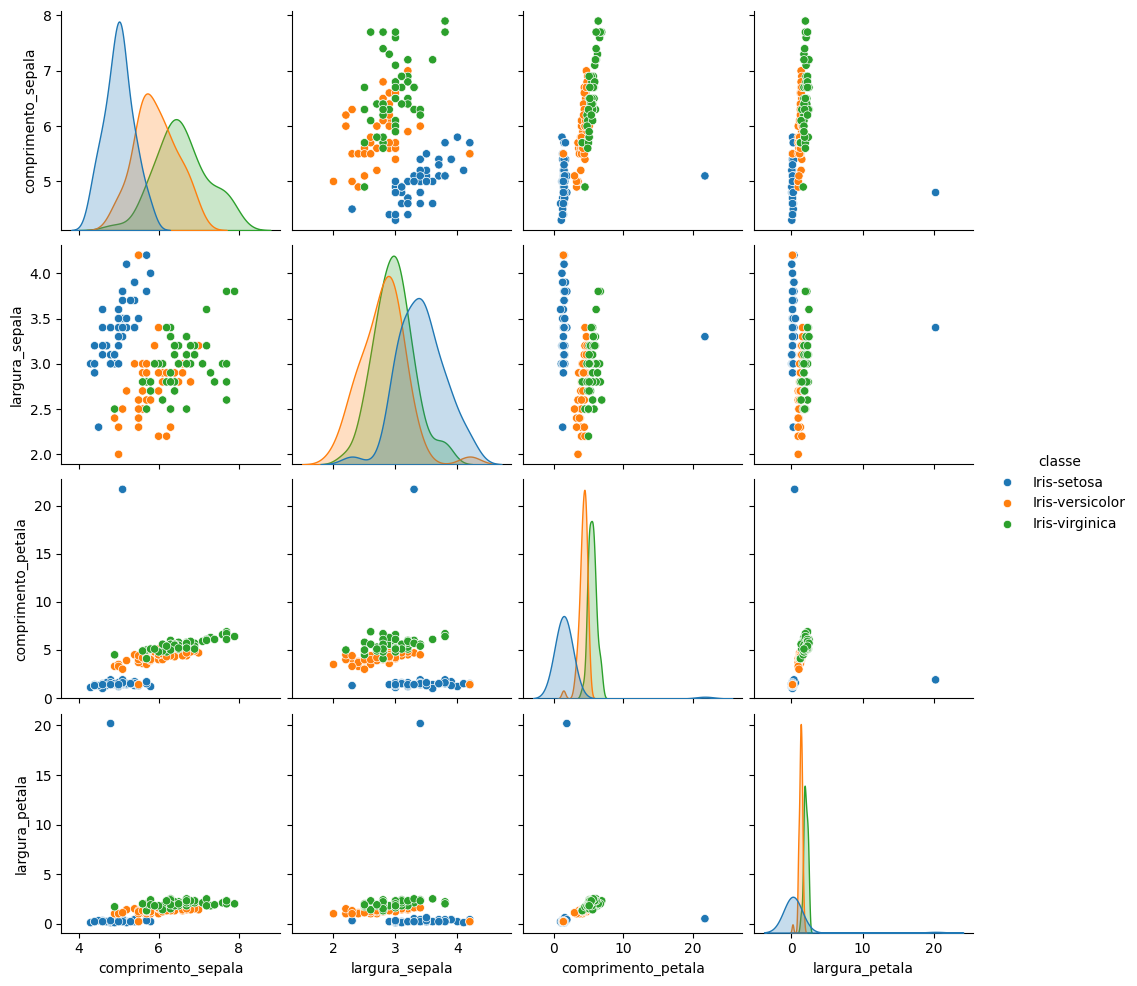

In [103]:
# matriz de gráficos scatter
sns.pairplot(dados, hue='classe', height=2.5)

# mostra o gráfico usando a função show() da matplotlib
plt.show()

Em relação aos dados inconsistentes: após a análise inicial, verificou-se que os atributos 'comprimento_petala' e 'largura_petala' apresentaram valores superiores a média e ao quartil 3. Adicionalmente, identificou-se um valor atípico no 'comprimento_petala' da classe 'Iris-versicolor', inferior ao valor 2.

Em relação aos dados ausentes (NaN): como não se observou diferença significativa nas médias por cor e classe, a média da classe 'Iris-virginica' de cada atributo será utilizada para substituir os valores ausentes.

##### 4. Pré-processamento: exclusão dos valores inconsistentes

In [104]:
# Visualização dos valores acima da média e quartil 3
dados.loc[dados['comprimento_petala'] > 10]

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cor,classe
23,5.1,3.3,21.7,0.5,amarela,Iris-setosa


In [105]:
dados.loc[dados['largura_petala'] > 10]

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cor,classe
24,4.8,3.4,1.9,20.2,roxa,Iris-setosa


In [106]:
# Valor inconsistente
dados.loc[(dados['classe'] == 'Iris-versicolor') & (dados['comprimento_petala'] < 2)]

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cor,classe
50,5.5,4.2,1.4,0.2,amarela,Iris-versicolor


In [107]:
# Exclusão de valores inconsistentes
# A opção escolhida foi a da exclusão dos valores inconsistentes, por entender que possivelmente não são valores outliers, devido ao afastamento das médias e dispersão em relação a sua classe
dados.drop([23,24, 50], inplace=True)

In [108]:
dados.loc[dados['comprimento_petala'] > 10]

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cor,classe


In [109]:
dados.loc[dados['largura_petala'] > 10]

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cor,classe


In [110]:
dados.loc[(dados['classe'] == 'Iris-versicolor') & (dados['comprimento_petala'] < 2)]

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cor,classe


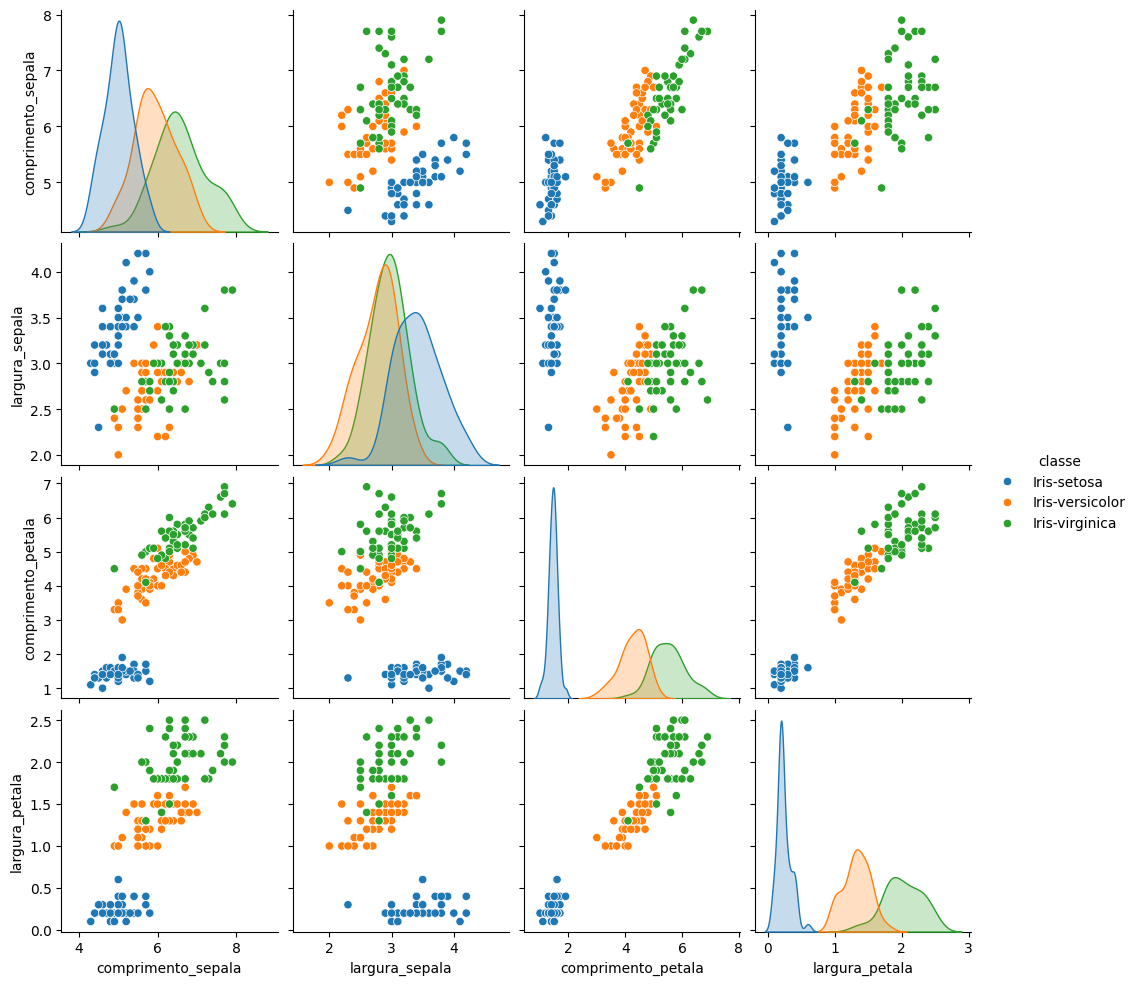

In [111]:
# matriz de gráficos scatter
sns.pairplot(dados, hue='classe', height=2.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

In [112]:
dados.describe()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,146.000000,149.000000,149.000000,147.000000
mean,5.841096,3.046980,3.787248,1.201361
std,0.824092,0.430204,1.755620,0.758512
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.200000,6.900000,2.500000


Após a segunda análise dos dados outliers, observou-se que o índice 41 da classe 'Iris-setosa', estava com a 'largura_sepala' menor que a média dos dados e em algumas dispersões fora do padrão da classe 'Iris-setosa', optou-se pela exclusão da instância.

In [113]:
dados.loc[(dados['largura_sepala'] < 2.5) & (dados['classe'] == 'Iris-setosa')]

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cor,classe
41,4.5,2.3,1.3,0.3,amarela,Iris-setosa


In [114]:
dados.loc[(dados['classe'] == 'Iris-setosa')]['largura_sepala'].mean()

np.float64(3.4166666666666665)

In [115]:
dados.drop([41], inplace=True)

In [116]:
dados.loc[(dados['largura_sepala'] < 2.5) & (dados['classe'] == 'Iris-setosa')]

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cor,classe


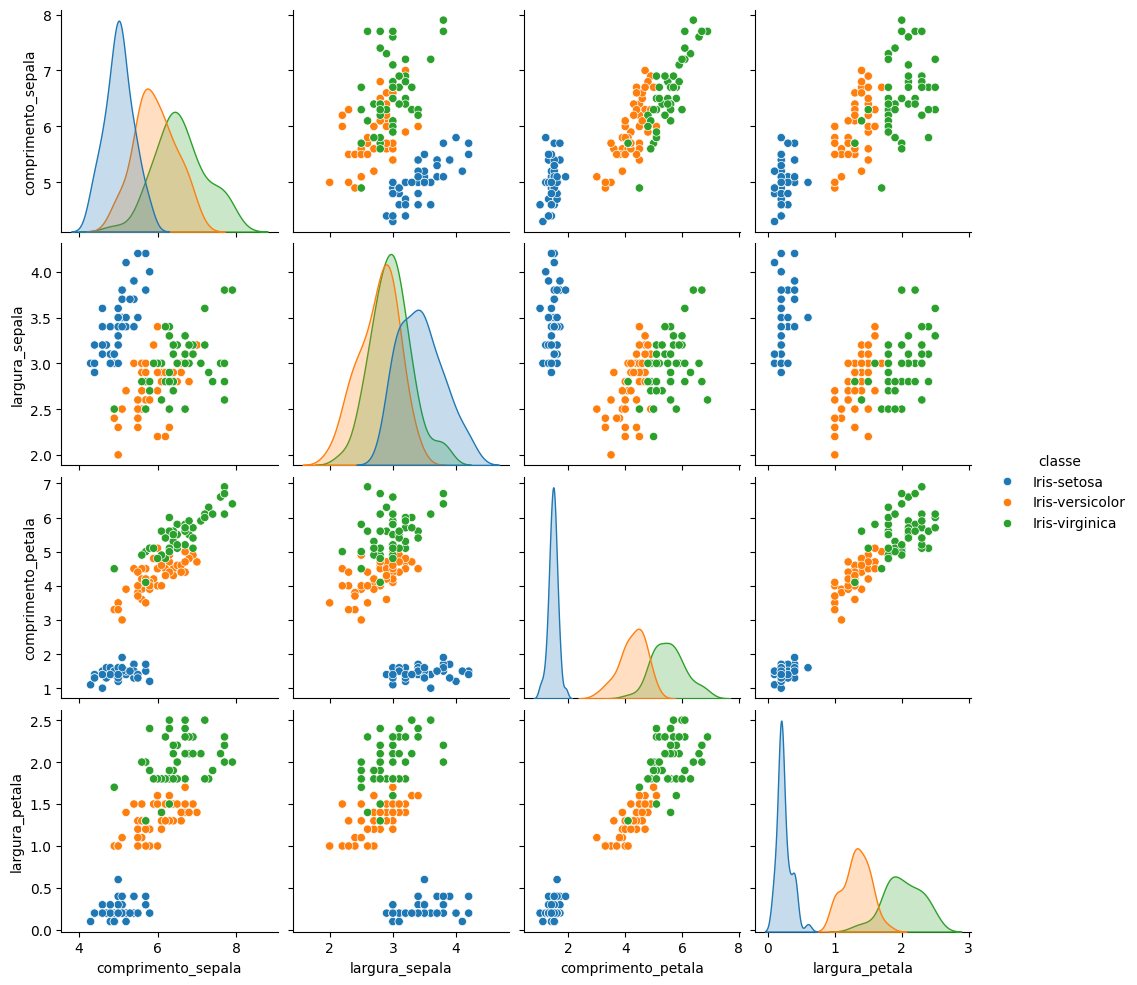

In [117]:
# matriz de gráficos scatter
sns.pairplot(dados, hue='classe', height=2.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

##### 5. Pré-processamento: substituição de valores ausentes pela média

In [118]:
# Verificação das classes
dados['classe'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [119]:
# Visualização dos índices ausentes após a exclusão de valores inconsistentes
idxRowNan2 = pd.isnull(dados).any(axis=1).to_numpy().nonzero()
idxRowNan2
dados.iloc[idxRowNan2]

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cor,classe
117,6.4,3.2,5.3,NaN,roxa,Iris-virginica
121,NaN,2.2,5.0,NaN,amarela,Iris-virginica
125,NaN,2.7,4.9,1.8,roxa,Iris-virginica
131,NaN,3.0,5.8,1.6,amarela,Iris-virginica


In [120]:
# Média do atributo 'comprimento_petala' para a classe 'Iris-virginica'
media_c_p = dados.loc[dados['classe'] == 'Iris-virginica']['comprimento_petala'].mean()
media_c_p

np.float64(5.523529411764706)

In [121]:
# Substituição dos valores ausentes pela média, de acordo com a classe
dados.loc[dados['comprimento_sepala'].isnull(), 'comprimento_sepala'] = media_c_p

In [122]:
dados.iloc[idxRowNan2]

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cor,classe
117,6.400000,3.2,5.3,NaN,roxa,Iris-virginica
121,5.523529,2.2,5.0,NaN,amarela,Iris-virginica
125,5.523529,2.7,4.9,1.8,roxa,Iris-virginica
131,5.523529,3.0,5.8,1.6,amarela,Iris-virginica


In [123]:
# Média do atributo 'largura_petala' para a classe 'Iris-virginica
media_l_p = dados.loc[dados['classe'] == 'Iris-virginica']['largura_petala'].mean()
media_l_p

np.float64(2.0163265306122446)

In [124]:
dados.loc[dados['largura_petala'].isnull(), 'largura_petala'] = media_l_p

In [125]:
dados.iloc[idxRowNan2]

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cor,classe
117,6.400000,3.2,5.3,2.016327,roxa,Iris-virginica
121,5.523529,2.2,5.0,2.016327,amarela,Iris-virginica
125,5.523529,2.7,4.9,1.800000,roxa,Iris-virginica
131,5.523529,3.0,5.8,1.600000,amarela,Iris-virginica
